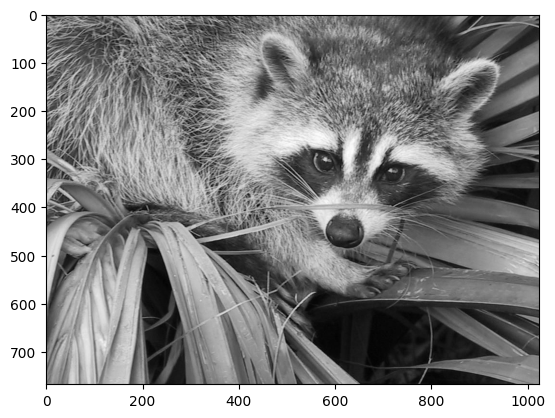

In [1]:

import scipy
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

X = scipy.datasets.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

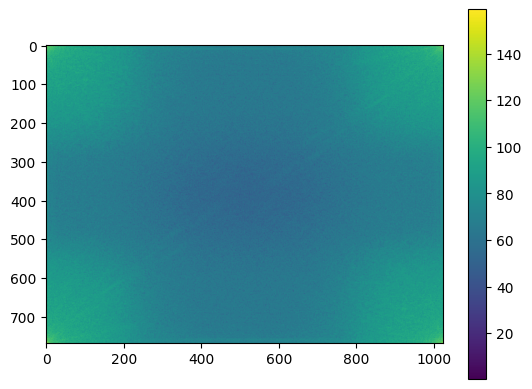

In [2]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

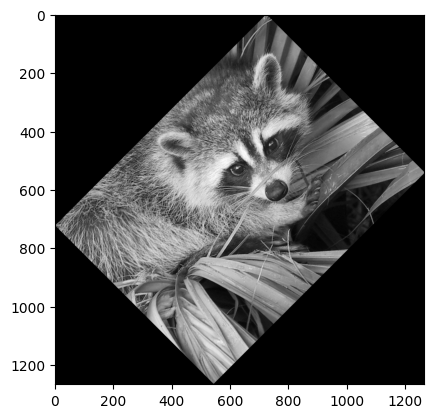

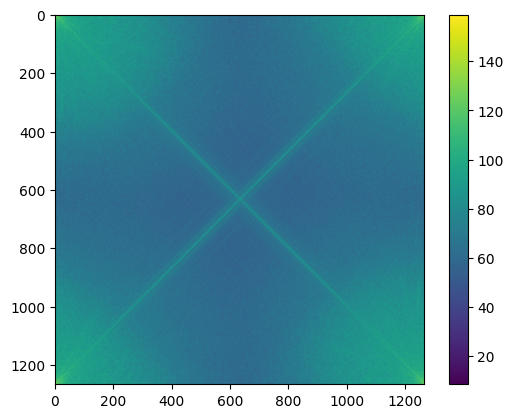

In [3]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

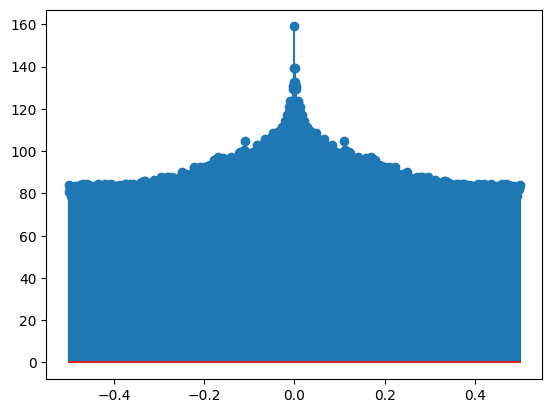

In [4]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

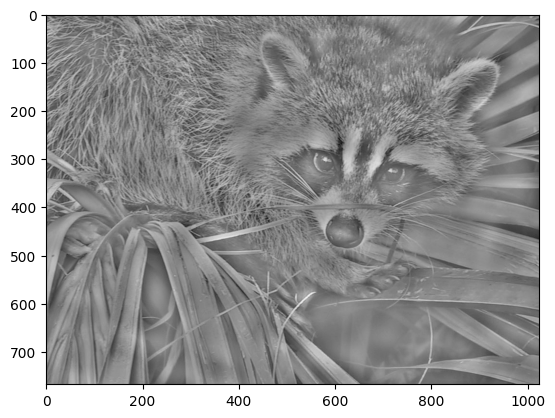

In [5]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

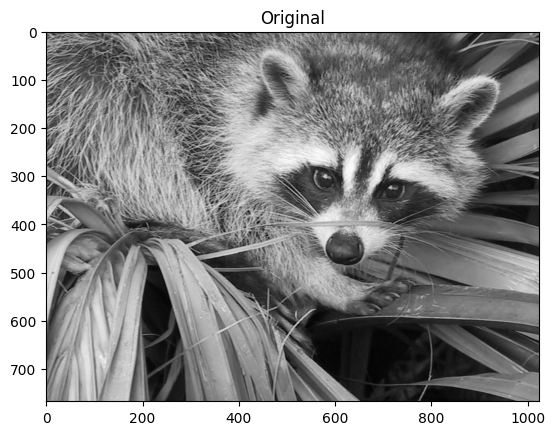

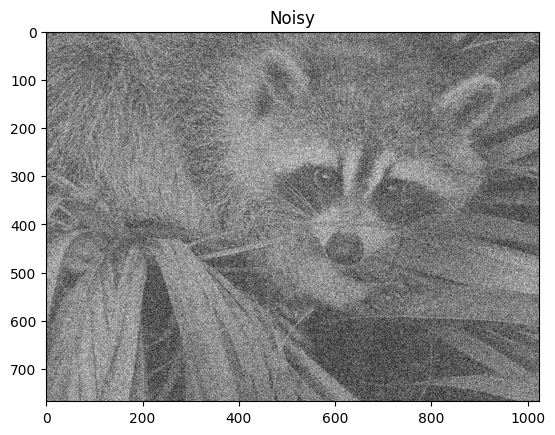

In [6]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

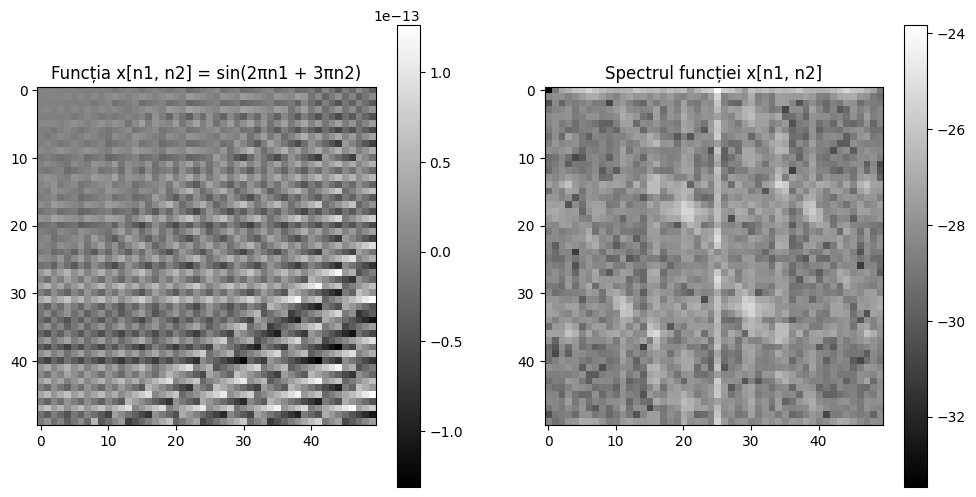

/var/folders/xn/95dw9msj3fj5r2hzpq6t5d580000gn/T/ipykernel_10158/2183181755.py:45: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(X2)), cmap='gray')


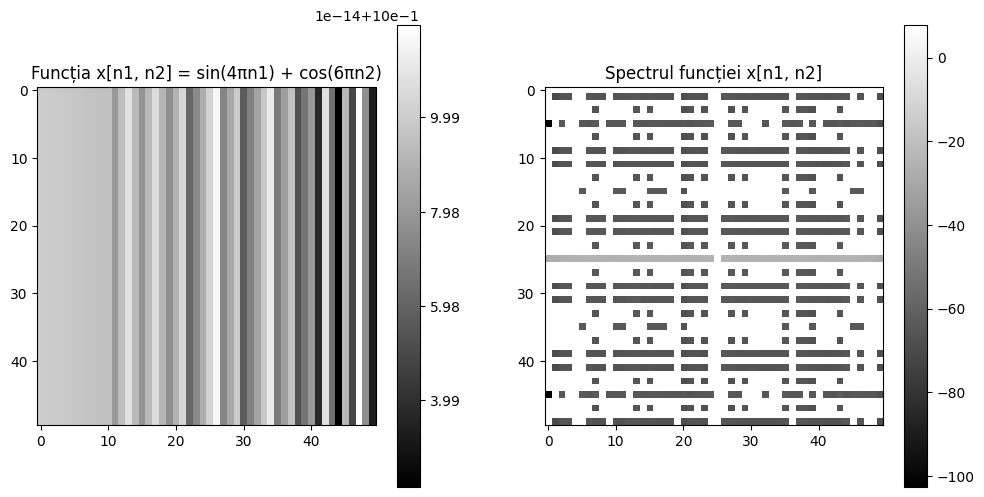

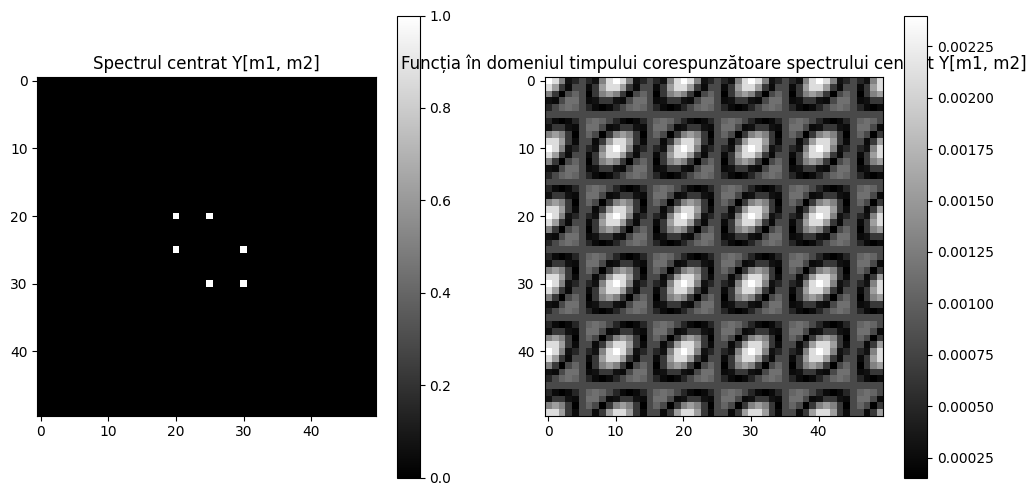

In [24]:
#EXERCITII

#1

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift

# Setăm dimensiunea gridului
N = 50
n1, n2 = np.meshgrid(np.arange(N), np.arange(N))

# Prima funcție x[n1, n2] = sin(2πn1 + 3πn2)
x1 = np.sin(2 * np.pi * n1 + 3 * np.pi * n2)

# Spectrul pentru prima funcție
X1 = fftshift(fft2(x1))

# Vizualizarea funcției și a spectrului
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(x1, cmap='gray')
plt.title("Funcția x[n1, n2] = sin(2πn1 + 3πn2)")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(X1)), cmap='gray')
plt.title("Spectrul funcției x[n1, n2]")
plt.colorbar()
plt.show()


# A doua funcție x[n1, n2] = sin(4πn1) + cos(6πn2)
x2 = np.sin(4 * np.pi * n1) + np.cos(6 * np.pi * n2)

# Spectrul pentru a doua funcție
X2 = fftshift(fft2(x2))

# Vizualizarea funcției și a spectrului
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(x2, cmap='gray')
plt.title("Funcția x[n1, n2] = sin(4πn1) + cos(6πn2)")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(X2)), cmap='gray')
plt.title("Spectrul funcției x[n1, n2]")
plt.colorbar()
plt.show()


# Crearea unui spectru cu valori specificate și mutarea valorilor în centrul matricei
Y = np.zeros((N, N))

# Setăm valorile în centrul matricei
center = N // 2
Y[center, center + 5] = Y[center, center - 5] = 1
Y[center + 5, center] = Y[center - 5, center] = 1
Y[center + 5, center + 5] = Y[center - 5, center - 5] = 1

# Aplicăm transformata Fourier inversă pentru a obține funcția în domeniul timpului
x3_centered = ifft2(fftshift(Y))

# Vizualizarea spectrului centrat și a funcției corespondente
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(Y), cmap='gray')
plt.title("Spectrul centrat Y[m1, m2]")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(np.abs(x3_centered), cmap='gray')
plt.title("Funcția în domeniul timpului corespunzătoare spectrului centrat Y[m1, m2]")
plt.colorbar()
plt.show()

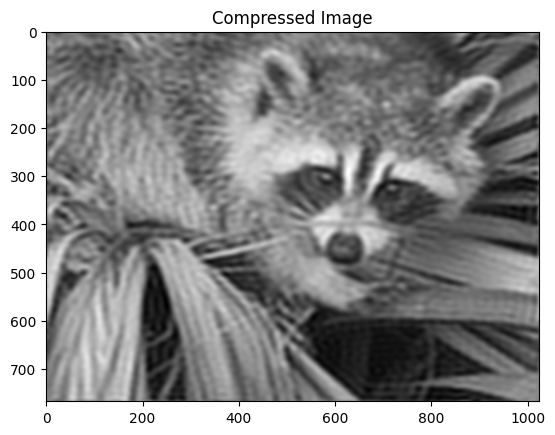

In [2]:
#2

import scipy
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

def low_pass_filter(img, cutoff_radius):
    """
    Apply a low-pass filter to the given image in the frequency domain.

    :param img: Image in the frequency domain (after applying fftshift).
    :param cutoff_radius: Radius of the low-pass filter circle.
    :return: Filtered image in the frequency domain.
    """
    rows, cols = img.shape
    center_row, center_col = rows // 2, cols // 2

    # Create a mask with a circle of ones and the rest zeros
    Y, X = np.ogrid[:rows, :cols]
    distance_from_center = np.sqrt((X - center_col)**2 + (Y - center_row)**2)
    mask = distance_from_center <= cutoff_radius

    return img * mask

# Loading the image
X = scipy.datasets.face(gray=True)

# Apply Fourier transform to the image
F = fft2(X)
F_shifted = fftshift(F)

# Choose a cutoff radius for the low-pass filter
cutoff_radius = 50  # Example value, can be adjusted

# Apply the low-pass filter
F_filtered = low_pass_filter(F_shifted, cutoff_radius)

# Applying inverse Fourier transform to get the compressed image
F_filtered_unshifted = ifftshift(F_filtered)
compressed_image = np.real(ifft2(F_filtered_unshifted))

# Displaying the compressed image
plt.imshow(compressed_image, cmap=plt.cm.gray)
plt.title("Compressed Image")
plt.show()


Initial SNR: -7.687080178274826 dB


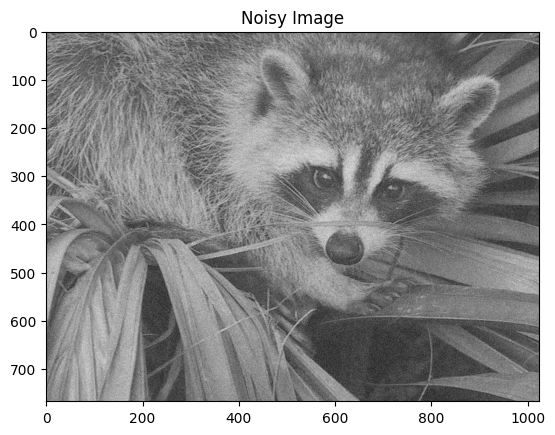

Final SNR: -7.64880064382183 dB


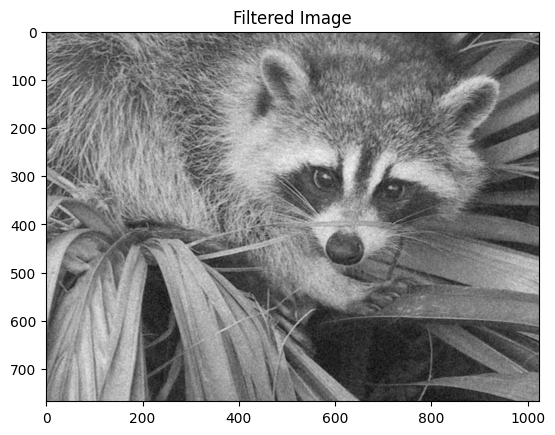

In [4]:
#3

import scipy
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

def calculate_snr(signal, noise):
    """
    Calculate the Signal-to-Noise Ratio (SNR).

    :param signal: Original signal (image).
    :param noise: Noise in the signal.
    :return: SNR in decibels.
    """
    signal_power = np.mean(signal ** 2)
    noise_power = np.mean(noise ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Loading the image
X = scipy.datasets.face(gray=True)

# Add Gaussian noise to the image
noise_std = 25
noise = np.random.normal(0, noise_std, X.shape)
noisy_image = X + noise

# Calculate the initial SNR
initial_snr = calculate_snr(X, noise)
print(f"Initial SNR: {initial_snr} dB")

# Displaying the noisy image
plt.imshow(noisy_image, cmap=plt.cm.gray)
plt.title("Noisy Image")
plt.show()

# Applying median filter to remove noise
filtered_image = median_filter(noisy_image, size=3)

# Calculate the noise after filtering
filtered_noise = noisy_image - filtered_image

# Calculate the SNR after noise removal
final_snr = calculate_snr(X, filtered_noise)
print(f"Final SNR: {final_snr} dB")

# Displaying the filtered image
plt.imshow(filtered_image, cmap=plt.cm.gray)
plt.title("Filtered Image")
plt.show()